In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("tennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [6]:
unique_vals=df.play.unique()
unique_vals

array(['no', 'yes'], dtype=object)

In [8]:
df.info

<bound method DataFrame.info of      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no>

In [12]:
df.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [14]:
df_encoded=df
cols=['outlook','temp','humidity','windy']
le=LabelEncoder()
for column in cols:
    df_encoded[column]=le.fit_transform(df_encoded[column])

In [15]:
df_encoded.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes


In [16]:
x= df_encoded.drop('play',axis=1)
y=df_encoded.play

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, 
recall_score

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,
                                                random_state=42)
data_unpruned=DecisionTreeClassifier(max_depth=None,random_state=42)
data_model=data_unpruned.fit(x_train,y_train)
data_model.score(x_test,y_test)

1.0

In [26]:
model=DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

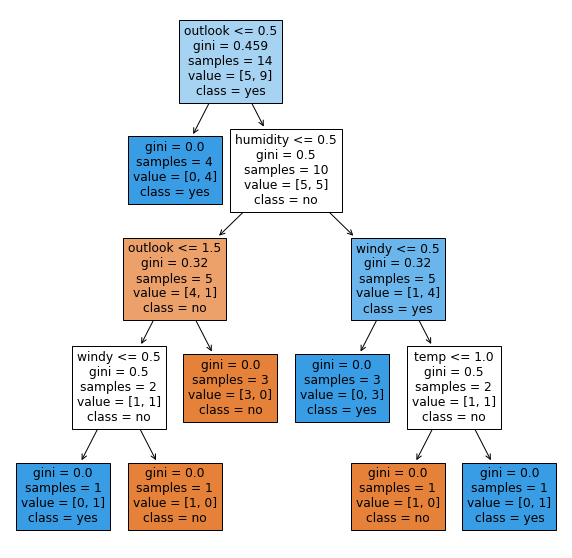

In [28]:
fig,ax= plt.subplots(figsize=(10,10))
tree.plot_tree(model,feature_names=x.columns, class_names=y.unique(), 
               filled=True, ax=ax)
plt.show()

In [30]:
y_pred=data_unpruned.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

100.0

In [31]:
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [0, 2]], dtype=int64)